<a href="https://colab.research.google.com/github/Jayasuriyaa10/SKYBUG/blob/main/Credit_Card_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
!pip install dataprep

from dataprep.eda import plot, plot_correlation, create_report, plot_missing
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252694 sha256=d637d47be

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, cohen_kappa_score,auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("/content/fraudTrain.csv")
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category        amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net   4.970000   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos 107.230000  Stephanie   
2                fraud_Lind-Buckridge  entertainment 220.110000     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport  45.000000     Jeremy   
4                 fraud_Keeling-Crist       misc_pos  41.960000      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

        lat        long    city_pop                                job  \
0 36.078800  -81.178100 3495.000000          Psychologist, counselling   
1 48.887800 -118.210500  149.000000  Special educational needs teacher   
2 42.180800 -112.262000 4154.000000        Nature conservation officer   
3 46.230600 -112.113800 1939.000000                    Patent attorney   
4 38.420700  -79.462900   99.000000     Dance movement psychotherapist   

          dob                         trans_num         unix_time  merch_lat  \
0  1988-03-09  0b242abb623afc578575680df30655b9 1325376018.000000  36.011293   
1  1978-06-21  1f76529f8574734946361c461b024d99 1325376044.000000  49.159047   
2  1962-01-19  a1a22d70485983eac12b5b88dad1cf95 1325376051.000000  43.150704   
3  1967-01-12  6b849c168bdad6f867558c3793159a81 1325376076.000000  47.034331   
4  1986-03-28  a41d7549acf90789359a9aa5346dcb46 1325376186.000000  38.674999   

   merch_long  is_fraud  
0  -82.048315  0.000000  
1 -118.186462  0.000000  
2 -112.154481  0.000000  
3 -112.561071  0.000000  
4  -78.632459  0.000000

In [ ]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud  count  percentage
0  0.000000  65480   98.997626
1  1.000000    663    1.002374

In [ ]:
df.nunique()

Unnamed: 0               66144
trans_date_trans_time    65379
cc_num                     915
merchant                   693
category                    14
amt                      18201
first                      338
last                       467
gender                       2
street                     915
city                       841
state                       50
zip                        904
lat                        903
long                       903
city_pop                   826
job                        477
dob                        901
trans_num                66143
unix_time                65378
merch_lat                66007
merch_long               66091
is_fraud                     2
dtype: int64


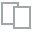
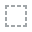
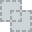
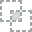
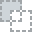
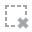
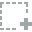
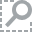
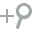
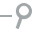
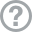
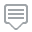
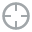
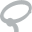
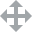
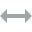
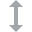
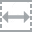
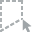
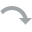
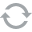
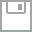
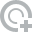
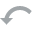
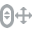
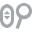
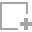
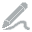
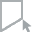
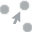
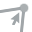
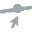

In [ ]:
plot(df, "amt", "state")

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [ ]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0        0
1        0
2        0
3        0
4        0
        ..
66139    0
66140    0
66141    0
66142    0
66143    0
Name: trans_hour, Length: 66144, dtype: int64

In [ ]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
66139    Saturday
66140    Saturday
66141    Saturday
66142    Saturday
66143    Saturday
Name: day_of_week, Length: 66144, dtype: object

In [ ]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
66139    2019-02
66140    2019-02
66141    2019-02
66142    2019-02
66143    2019-02
Name: year_month, Length: 66144, dtype: period[M]

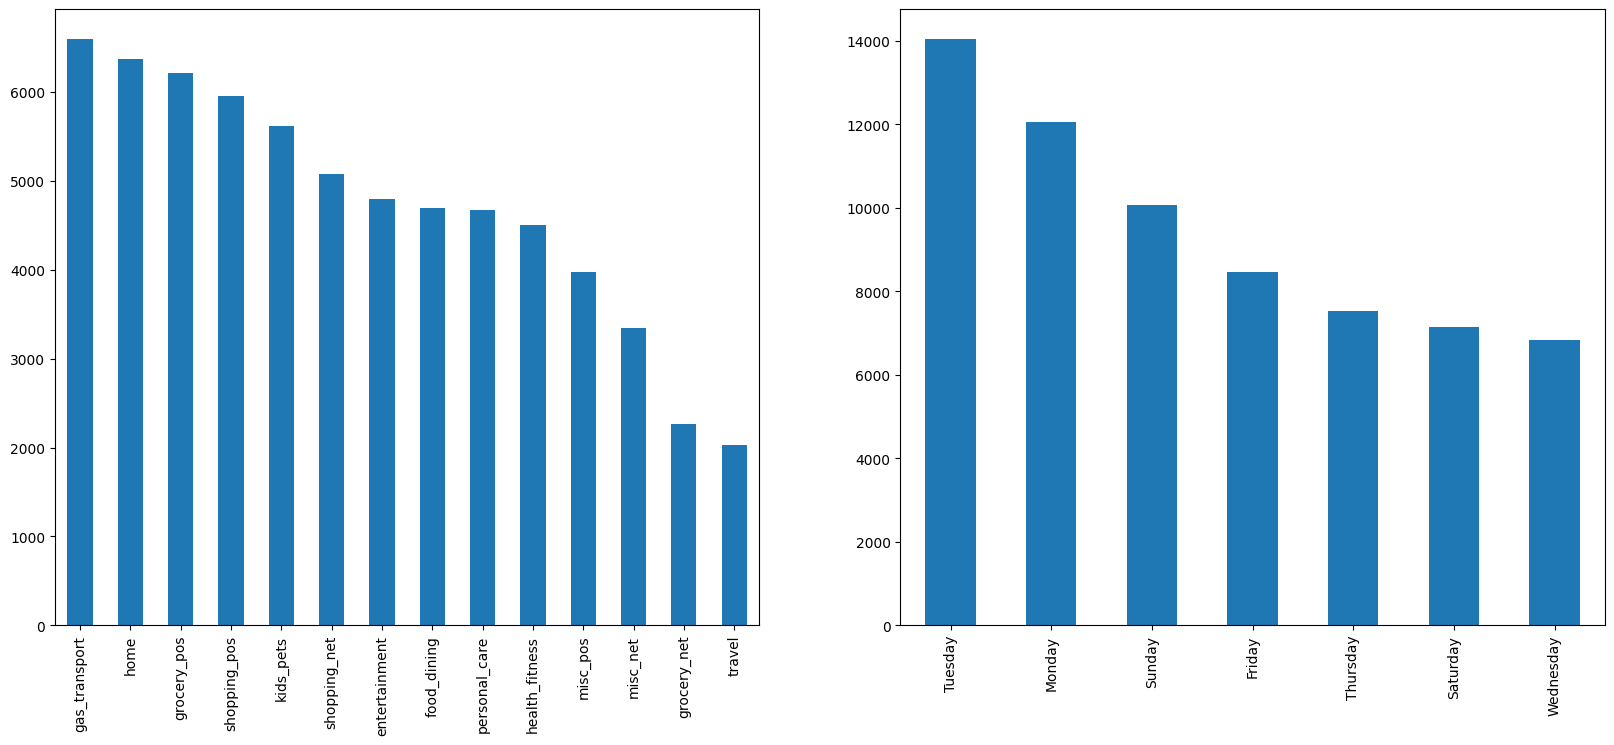

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

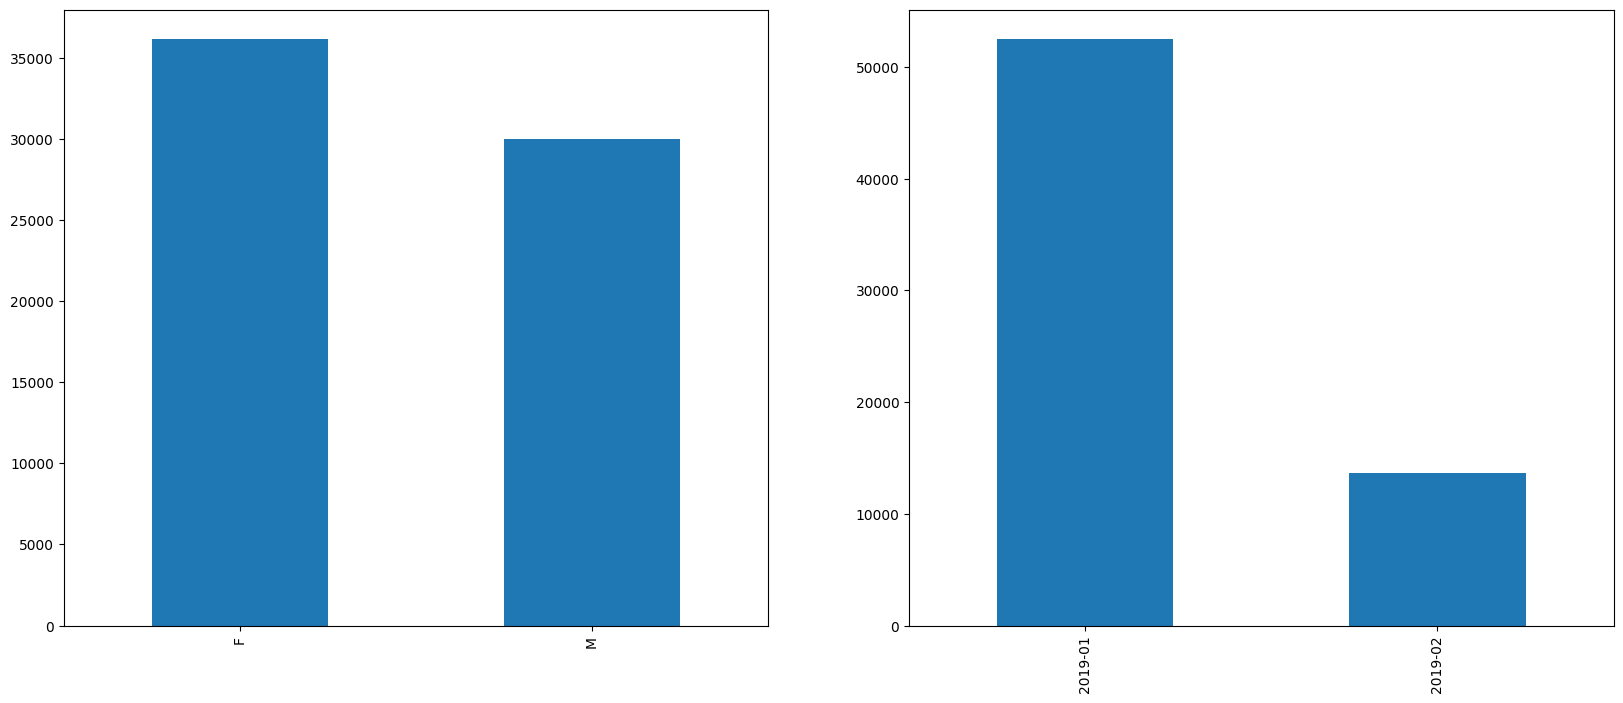

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


In [ ]:
df.state.value_counts(normalize=True)

TX   0.073159
NY   0.065720
PA   0.061805
CA   0.042619
MI   0.035559
OH   0.035302
IL   0.034259
FL   0.033442
AL   0.032339
MO   0.030857
AR   0.024099
MN   0.024054
NC   0.023978
VA   0.023449
WI   0.022466
SC   0.021937
KY   0.021801
IN   0.020516
IA   0.020516
WV   0.020410
MD   0.019820
GA   0.019503
OK   0.019427
NJ   0.019306
NE   0.018248
KS   0.018036
MS   0.015905
LA   0.015708
OR   0.014589
WA   0.014484
WY   0.013667
NM   0.013471
TN   0.013229
ME   0.012926
ND   0.010522
CO   0.010402
MT   0.009903
AZ   0.009116
MA   0.008980
VT   0.008844
SD   0.008512
UT   0.008134
CT   0.006471
NH   0.006153
ID   0.004536
NV   0.004067
DC   0.003296
HI   0.002101
AK   0.001890
RI   0.000469
Name: state, dtype: float64

In [ ]:
df.job.value_counts(normalize=True,ascending=False)

Exhibition designer                                           0.007393
Film/video editor                                             0.007272
Surveyor, land/geomatics                                      0.006849
Naval architect                                               0.006622
Designer, ceramics/pottery                                    0.006471
Systems developer                                             0.006289
IT trainer                                                    0.006093
Chief Executive Officer                                       0.005836
Comptroller                                                   0.005806
Chartered public finance accountant                           0.005806
Environmental consultant                                      0.005790
Materials engineer                                            0.005715
Financial adviser                                             0.005564
Magazine features editor                                      0.005428
Agricu

In [ ]:
df['dob'] = pd.to_datetime(df['dob'])

df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

df['age'].describe()

count   66143.000000
mean       45.343483
std        17.357073
min        14.000000
25%        32.000000
50%        43.000000
75%        56.000000
max        94.000000
Name: age, dtype: float64

In [ ]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              66144.000000                65480.000000   
1     mean                 72.006466                   67.408734   
2      std                152.805004                  141.086933   
3      min                  1.000000                    1.000000   
4      50%                 47.950000                   47.575000   
5      95%                201.255000                  190.341000   
6    99.9%               1432.504680                 1434.852920   
7      max              12788.070000                12788.070000   

   Fraud Amt Distribution  
0              663.000000  
1              525.690830  
2              394.607394  
3                4.500000  
4              353.060000  
5             1097.218000  
6             1302.426400  
7             1334.070000

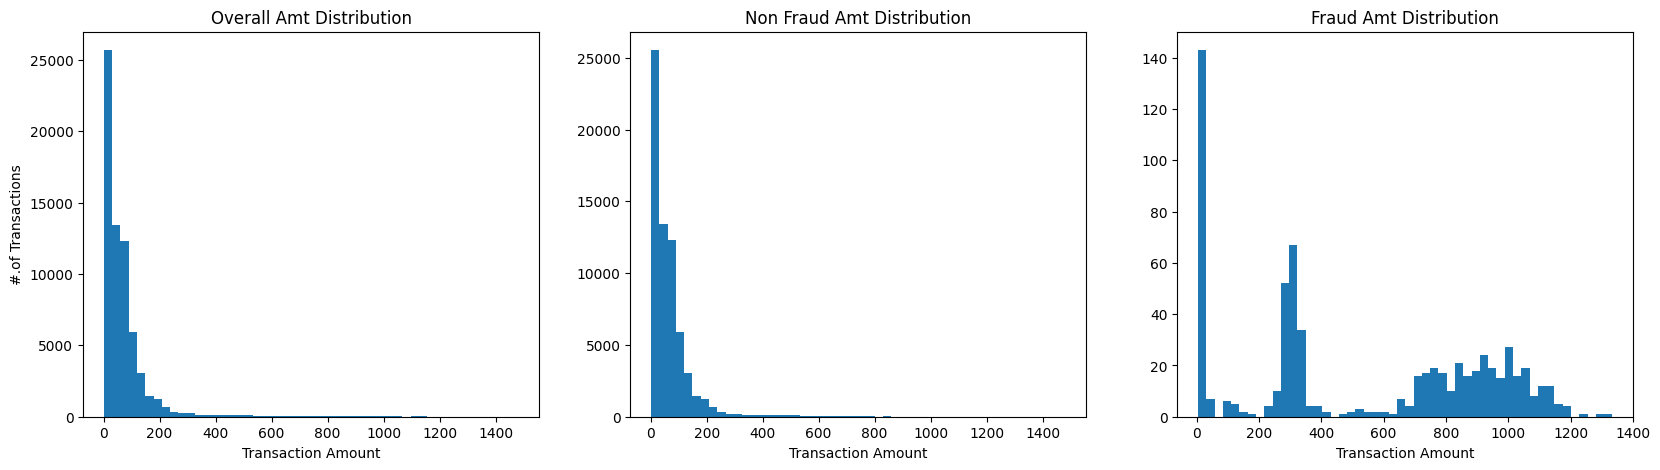

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

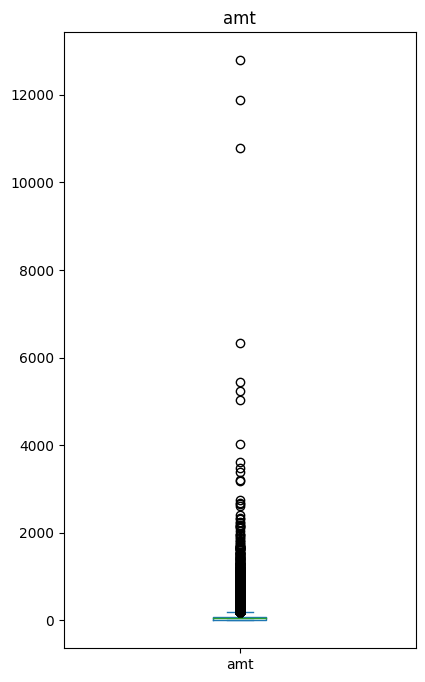

In [ ]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

In [ ]:
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0    2019-01                52525        913
1    2019-02                13618        911

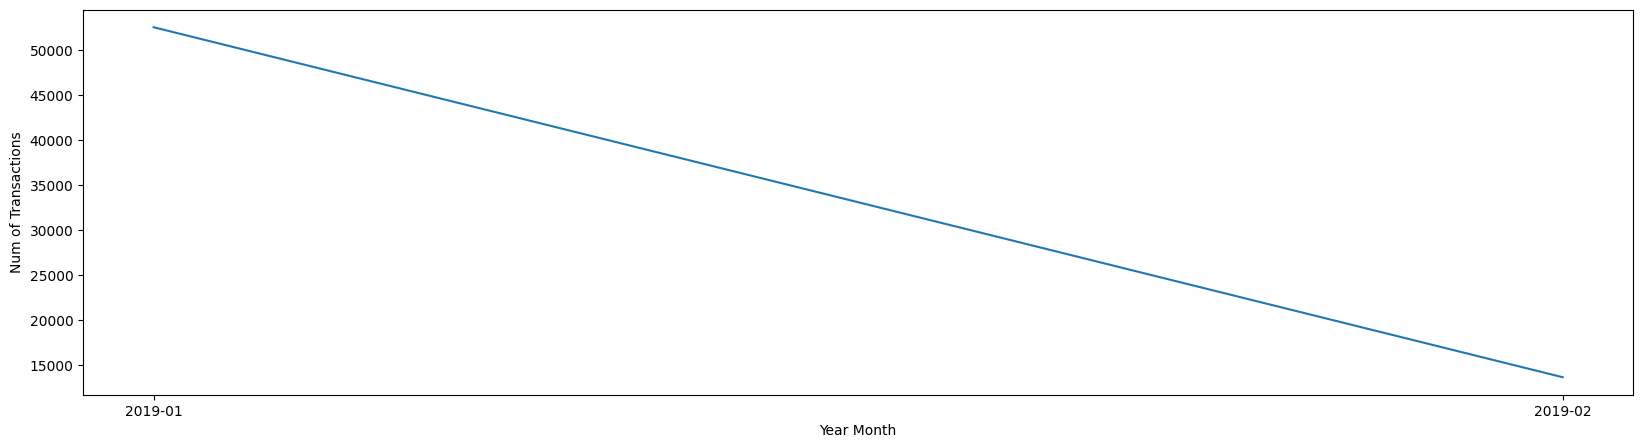

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


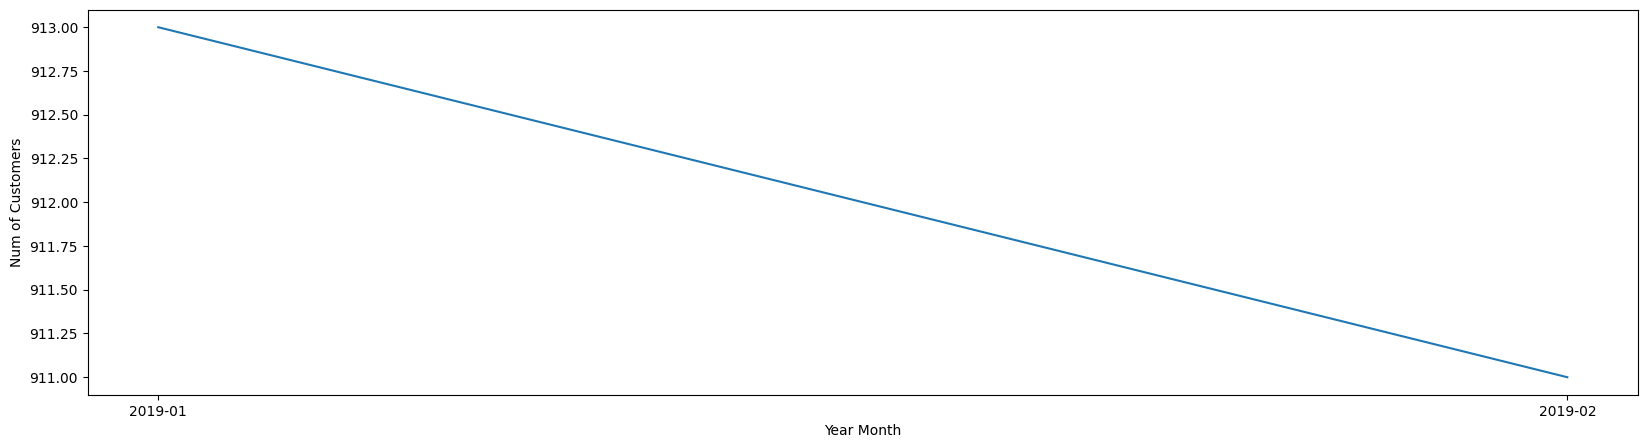

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()


In [ ]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0    2019-01                        506               50
1    2019-02                        157               17

In [ ]:
print(df_timeline02['num_of_fraud_transactions'].mean())

331.5


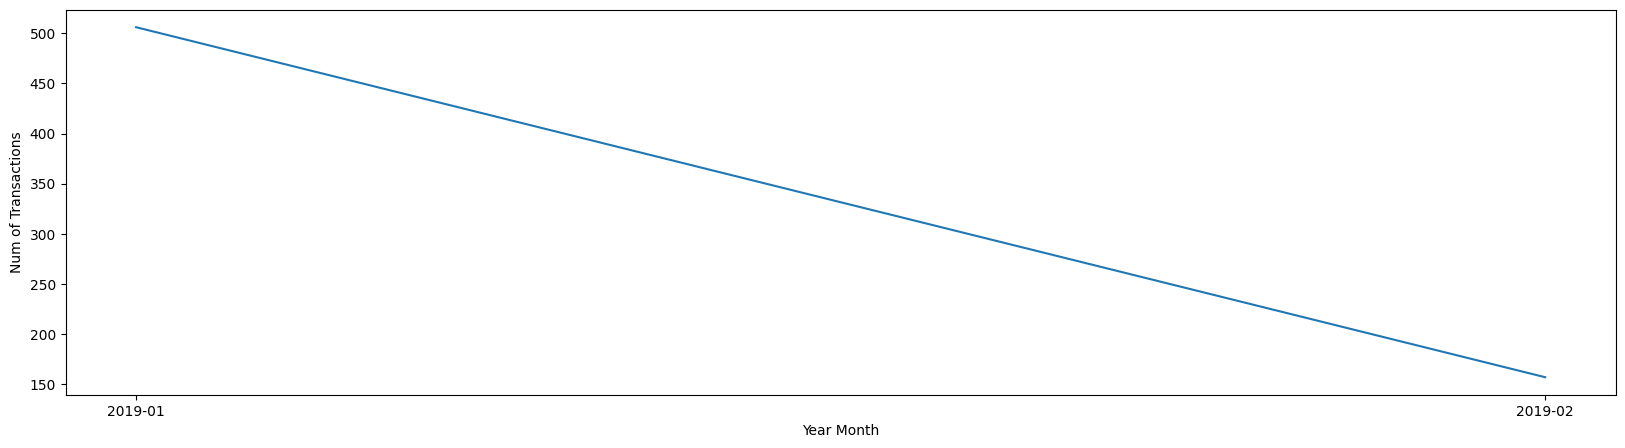

In [ ]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

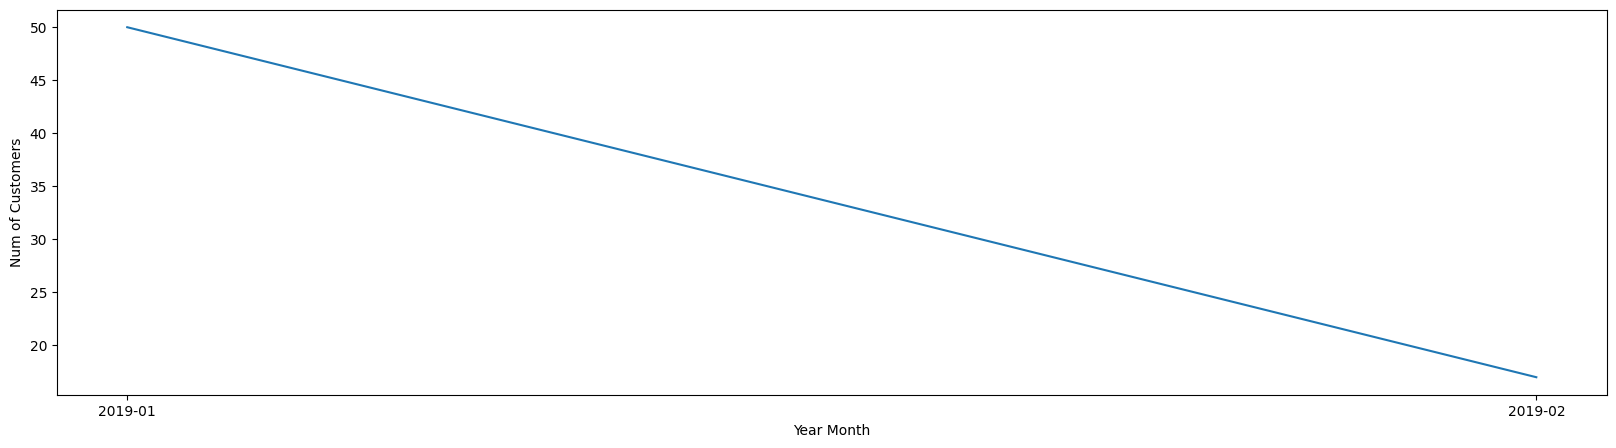

In [ ]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [ ]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count   percent
0      F         36173 54.689083
1      M         29970 45.310917

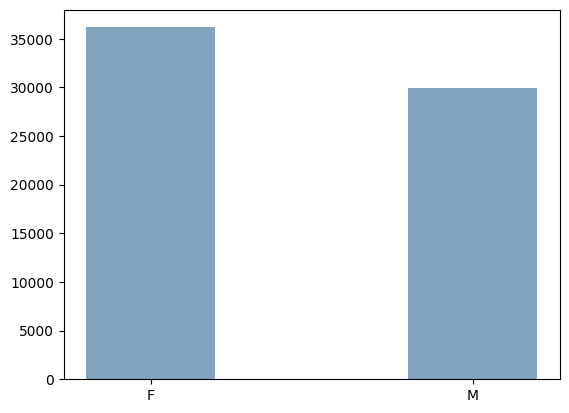

In [ ]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

In [ ]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud  count  gender_count  percent_grp
0      F  0.000000  35790         36173    98.941199
1      F  1.000000    383         36173     1.058801
2      M  0.000000  29690         29970    99.065732
3      M  1.000000    280         29970     0.934268

In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count  percent
2    gas_transport            6603 9.982916
6             home            6373 9.635184
4      grocery_pos            6220 9.403867
12    shopping_pos            5962 9.013803
7        kids_pets            5624 8.502789
11    shopping_net            5074 7.671258
0    entertainment            4798 7.253980
1      food_dining            4697 7.101281
10   personal_care            4678 7.072555
5   health_fitness            4502 6.806465
9         misc_pos            3971 6.003659
8         misc_net            3349 5.063272
3      grocery_net            2267 3.427422
13          travel            2025 3.061548

In [ ]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

index        Category  category_count  percent
0       2   gas_transport            6603 9.982916
1       6            home            6373 9.635184
2       4     grocery_pos            6220 9.403867
3      12    shopping_pos            5962 9.013803
4       7       kids_pets            5624 8.502789
5      11    shopping_net            5074 7.671258
6       0   entertainment            4798 7.253980
7       1     food_dining            4697 7.101281
8      10   personal_care            4678 7.072555
9       5  health_fitness            4502 6.806465
10      9        misc_pos            3971 6.003659
11      8        misc_net            3349 5.063272
12      3     grocery_net            2267 3.427422
13     13          travel            2025 3.061548

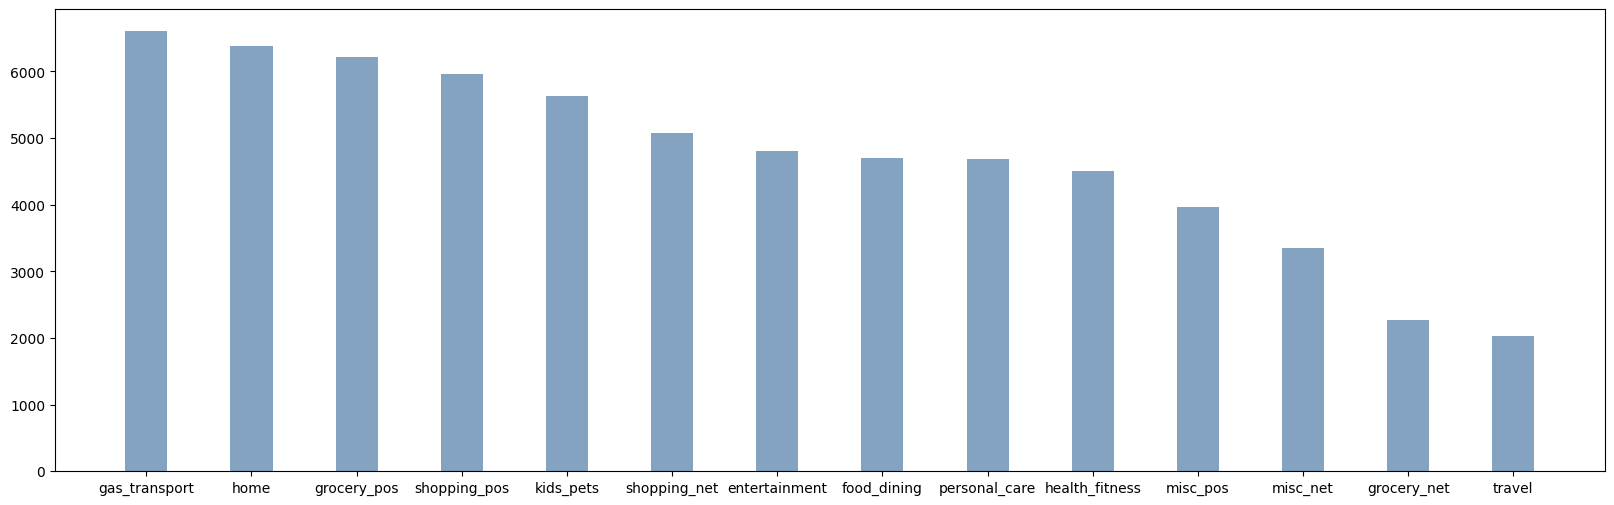

In [ ]:
fig = plt.figure(figsize = (20, 6))


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

In [ ]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [ ]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud  count  category_count  percent  percent_grp
4    gas_transport  0.000000   6547            6603 9.982916    99.151901
5    gas_transport  1.000000     56            6603 9.982916     0.848099
13            home  1.000000     14            6373 9.635184     0.219677
12            home  0.000000   6359            6373 9.635184    99.780323
8      grocery_pos  0.000000   6060            6220 9.403867    97.427653
9      grocery_pos  1.000000    160            6220 9.403867     2.572347
25    shopping_pos  1.000000     81            5962 9.013803     1.358604
24    shopping_pos  0.000000   5881            5962 9.013803    98.641396
14       kids_pets  0.000000   5597            5624 8.502789    99.519915
15       kids_pets  1.000000     27            5624 8.502789     0.480085
23    shopping_net  1.000000    144            5074 7.671258     2.837998
22    shopping_net  0.000000   4930            5074 7.671258    97.162002
1    entertainment  1.000000     15            4798 7.253980     0.312630
0    entertainment  0.000000   4783            4798 7.253980    99.687370
3      food_dining  1.000000     13            4697 7.101281     0.276772
2      food_dining  0.000000   4684            4697 7.101281    99.723228
20   personal_care  0.000000   4657            4678 7.072555    99.551090
21   personal_care  1.000000     21            4678 7.072555     0.448910
11  health_fitness  1.000000     11            4502 6.806465     0.244336
10  health_fitness  0.000000   4491            4502 6.806465    99.755664
18        misc_pos  0.000000   3950            3971 6.003659    99.471166
19        misc_pos  1.000000     21            3971 6.003659     0.528834
16        misc_net  0.000000   3272            3349 5.063272    97.700806
17        misc_net  1.000000     77            3349 5.063272     2.299194
7      grocery_net  1.000000     10            2267 3.427422     0.441112
6      grocery_net  0.000000   2257            2267 3.427422    99.558888
26          travel  0.000000   2012            2025 3.061548    99.358025
27          travel  1.000000     13            2025 3.061548     0.641975

In [ ]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

Category  is_fraud  count  category_count  percent  percent_grp
13            home  1.000000     14            6373 9.635184     0.219677
11  health_fitness  1.000000     11            4502 6.806465     0.244336
3      food_dining  1.000000     13            4697 7.101281     0.276772
1    entertainment  1.000000     15            4798 7.253980     0.312630
7      grocery_net  1.000000     10            2267 3.427422     0.441112
21   personal_care  1.000000     21            4678 7.072555     0.448910
15       kids_pets  1.000000     27            5624 8.502789     0.480085
19        misc_pos  1.000000     21            3971 6.003659     0.528834
27          travel  1.000000     13            2025 3.061548     0.641975
5    gas_transport  1.000000     56            6603 9.982916     0.848099
25    shopping_pos  1.000000     81            5962 9.013803     1.358604
17        misc_net  1.000000     77            3349 5.063272     2.299194
9      grocery_pos  1.000000    160            6220 9.403867     2.572347
23    shopping_net  1.000000    144            5074 7.671258     2.837998

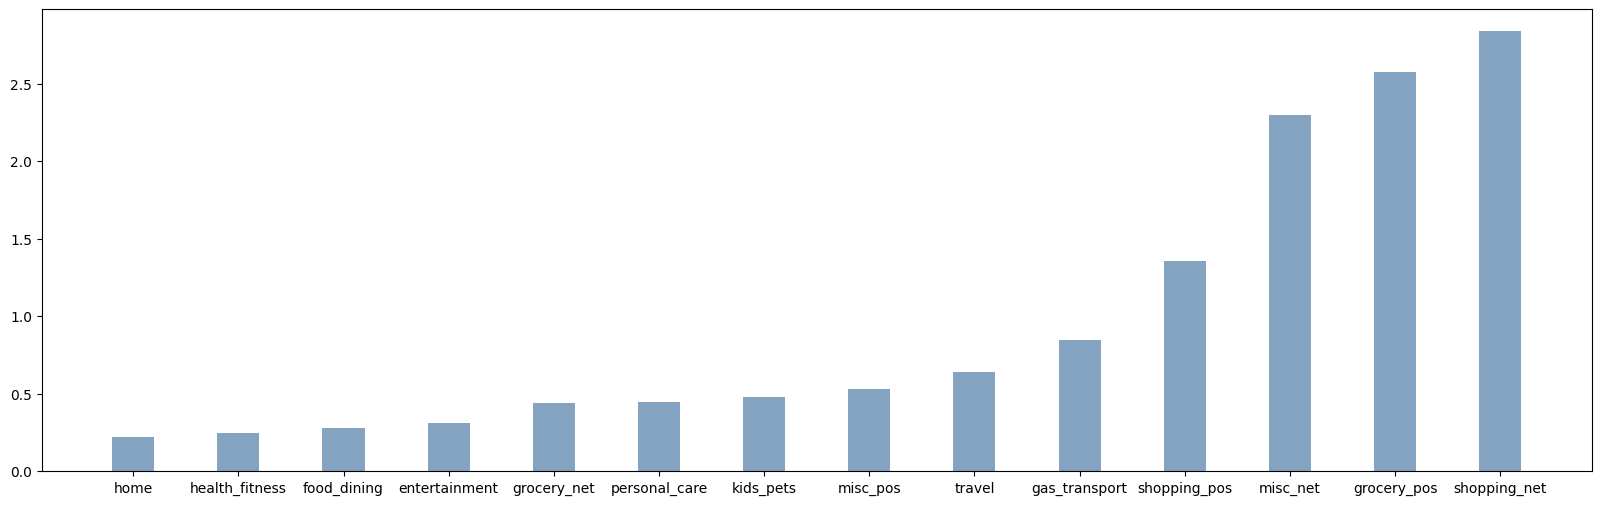

In [ ]:
fig = plt.figure(figsize = (20, 6))


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

In [ ]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Cormier LLC                             0.003266
fraud_Kilback LLC                             0.003130
fraud_Schumm PLC                              0.002963
fraud_Boyer PLC                               0.002842
fraud_Dickinson Ltd                           0.002661
fraud_Kuhn LLC                                0.002631
fraud_Jakubowski Inc                          0.002419
fraud_Streich Ltd                             0.002419
fraud_Kuvalis Ltd                             0.002358
fraud_Koepp-Witting                           0.002343
fraud_Pacocha-O'Reilly                        0.002343
fraud_Casper, Hand and Zulauf                 0.002298
fraud_Berge LLC                               0.002298
fraud_Stark-Koss                              0.002253
fraud_Mraz-Herzog                             0.002238
fraud_Medhurst Inc                            0.002207
fraud_Connelly-Carter                         0.002207
fraud_Bartoletti-Wunsch                       0.002192
fraud_Kutc

In [ ]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count  percent
105                            fraud_Cormier LLC             216 0.326565
316                            fraud_Kilback LLC             207 0.312958
571                             fraud_Schumm PLC             196 0.296328
70                               fraud_Boyer PLC             188 0.284233
136                          fraud_Dickinson Ltd             176 0.266090
349                               fraud_Kuhn LLC             174 0.263066
279                         fraud_Jakubowski Inc             160 0.241900
603                            fraud_Streich Ltd             160 0.241900
365                            fraud_Kuvalis Ltd             156 0.235853
329                          fraud_Koepp-Witting             155 0.234341
468                       fraud_Pacocha-O'Reilly             155 0.234341
43                               fraud_Berge LLC             152 0.229805
87                 fraud_Casper, Hand and Zulauf             152 0.229805
596                             fraud_Stark-Koss             149 0.225269
444                            fraud_Mraz-Herzog             148 0.223758
100                        fraud_Connelly-Carter             146 0.220734
420                           fraud_Medhurst Inc             146 0.220734
358                              fraud_Kutch LLC             145 0.219222
24                       fraud_Bartoletti-Wunsch             145 0.219222
213           fraud_Gutmann, McLaughlin and Wiza             145 0.219222
47                            fraud_Bernhard Inc             142 0.214686
91                         fraud_Champlin-Casper             141 0.213174
103                     fraud_Conroy-Cruickshank             141 0.213174
415                      fraud_McDermott-Weimann             141 0.213174
99          fraud_Connelly, Reichert and Fritsch             140 0.211663
548         fraud_Schaefer, Maggio and Daugherty             140 0.211663
155                       fraud_Eichmann-Kilback             139 0.210151
395                fraud_Lockman, West and Runte             139 0.210151
332                          fraud_Koss and Sons             138 0.208639
183                          fraud_Friesen-Stamm             138 0.208639
625                           fraud_Torp-Labadie             138 0.208639
211                          fraud_Gulgowski LLC             138 0.208639
229                             fraud_Harber Inc             138 0.208639
270               fraud_Huel, Hammes and Witting             138 0.208639
518          fraud_Robel, Cummerata and Prosacco             138 0.208639
285             fraud_Jenkins, Hauck and Friesen             137 0.207127
407                              fraud_Marks Inc             137 0.207127
391                             fraud_Little Ltd             137 0.207127
107                         fraud_Corwin-Collins             137 0.207127
387                              fraud_Lesch Ltd             137 0.207127
364                        fraud_Kutch-Wilderman             137 0.207127
119                           fraud_Cummings LLC             136 0.205615
656            fraud_Watsica, Haag and Considine             136 0.205615
537                         fraud_Ruecker-Mayert             136 0.205615
614                              fraud_Terry Ltd             136 0.205615
69                       fraud_Botsford and Sons             136 0.205615
471                          fraud_Padberg-Sauer             136 0.205615
645                        fraud_Vandervort-Funk             136 0.205615
483                          fraud_Pouros-Conroy             135 0.204103
241              fraud_Heller, Gutmann and Zieme             135 0.204103
481                            fraud_Pollich LLC             135 0.204103
494                           fraud_Rau and Sons             135 0.204103
231                             fraud_Harris Inc             135 0.204103
268                           fraud_Hudson-R

In [ ]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  \
484                           fraud_Koepp-Parker  1.000000      9   
924           fraud_Tillman, Fritsch and Schmitt  1.000000      4   
934             fraud_Towne, Greenholt and Koepp  1.000000      5   
50              fraud_Baumbach, Feeney and Morar  1.000000      5   
121                              fraud_Brown PLC  1.000000      4   
667                         fraud_Murray-Smitham  1.000000      7   
257               fraud_Ferry, Lynch and Kautzer  1.000000      4   
289                     fraud_Gleason-Macejkovic  1.000000      6   
545              fraud_Labadie, Treutel and Bode  1.000000      6   
582              fraud_Little, Gutmann and Lynch  1.000000      5   
458                         fraud_Kiehn-Emmerich  1.000000      6   
894                     fraud_Stoltenberg-Beatty  1.000000      6   
647               fraud_Moore, Dibbert and Koepp  1.000000      3   
486                          fraud_Koepp-Witting  1.000000      8   
294                       fraud_Goodwin-Nitzsche  1.000000      6   
587                fraud_Lockman, West and Runte  1.000000      7   
433            fraud_Jones, Sawayn and Romaguera  1.000000      3   
802                          fraud_Ruecker Group  1.000000      3   
462            fraud_Kihn, Abernathy and Douglas  1.000000      5   
58                            fraud_Bednar Group  1.000000      3   
569              fraud_Lehner, Mosciski and King  1.000000      3   
845            fraud_Schoen, Kuphal and Nitzsche  1.000000      6   
619                      fraud_McGlynn-Heathcote  1.000000      4   
47                            fraud_Bauch-Raynor  1.000000      6   
352                          fraud_Heathcote LLC  1.000000      5   
511                              fraud_Kuhic Inc  1.000000      5   
857             fraud_Schumm, Bauch and Ondricka  1.000000      5   
764                             fraud_Rempel Inc  1.000000      4   
958                            fraud_Volkman Ltd  1.000000      3   
1007                        fraud_Wuckert-Walter  1.000000      2   
164                        fraud_Corwin-Gorczany  1.000000      3   
685                         fraud_O'Keefe-Hudson  1.000000      5   
837                       fraud_Schmidt and Sons  1.000000      4   
883                          fraud_Stamm-Witting  1.000000      3   
52          fraud_Baumbach, Hodkiewicz and Walsh  1.000000      4   
499                            fraud_Kozey-Boehm  1.000000      4   
429       fraud_Johnson, Runolfsdottir and Mayer  1.000000      2   
603                            fraud_Mante Group  1.000000      2   
262                      fraud_Fisher-Schowalter  1.000000      3   
211                        fraud_Dooley-Thompson  1.000000      3   
10         fraud_Altenwerth, Cartwright and Koss  1.000000      3   
349           fraud_Hayes, Marquardt and Dibbert  1.000000      2   
449                        fraud_Kerluke-Abshire  1.000000      3   
418                               fraud_Jast Ltd  1.000000      3   
625                           fraud_Medhurst PLC  1.000000      4   
453                          fraud_Kessler Group  1.000000      1   
265                         fraud_Flatley-Durgan  1.000000      2   
328         fraud_Hahn, Bahringer and McLaughlin  1.000000      3   
703                          fraud_Padberg-Welch  1.000000      4   
716                       fraud_Pfeffer and Sons  1.000000      4   
144                               fraud_Cole PLC  1.000000      4   
1012                           fraud_Yost-Rogahn  1.000000      3   
698                       fraud_Pacocha-O'Reilly  1.000000      5   
523                              fraud_Kunze Inc  1.000000      4   
507                           fraud_Kris-Weimann  1.000000      2   
436                           fraud_Kassulke PLC  1.000000      3   
637               fraud_Moen, Reinger and Murphy  1.000000      4   
356                        fraud_Heide

In [ ]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [ ]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [ ]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):

    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [ ]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
time_index                                                                
2019-01-01 00:00:18           0   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44           1   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51           2   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16           3   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06           4   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                           amt      first     last gender  \
time_index                                                  
2019-01-01 00:00:18   4.970000   Jennifer    Banks      F   
2019-01-01 00:00:44 107.230000  Stephanie     Gill      F   
2019-01-01 00:00:51 220.110000     Edward  Sanchez      M   
2019-01-01 00:01:16  45.000000     Jeremy    White      M   
2019-01-01 00:03:06  41.960000      Tyler   Garcia      M   

                                           street            city state  \
time_index                                                                
2019-01-01 00:00:18                561 Perry Cove  Moravian Falls    NC   
2019-01-01 00:00:44  43039 Riley Greens Suite 393          Orient    WA   
2019-01-01 00:00:51      594 White Dale Suite 530      Malad City    ID   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038         Boulder    MT   
2019-01-01 00:03:06              408 Bradley Rest        Doe Hill    VA   

                       zip       lat        long    city_pop  \
time_index                                                     
2019-01-01 00:00:18  28654 36.078800  -81.178100 3495.000000   
2019-01-01 00:00:44  99160 48.887800 -118.210500  149.000000   
2019-01-01 00:00:51  83252 42.180800 -112.262000 4154.000000   
2019-01-01 00:01:16  59632 46.230600 -112.113800 1939.000000   
2019-01-01 00:03:06  24433 38.420700  -79.462900   99.000000   

                                                   job        dob  \
time_index                                                          
2019-01-01 00:00:18          Psychologist, counselling 1988-03-09   
2019-01-01 00:00:44  Special educational needs teacher 1978-06-21   
2019-01-01 00:00:51        Nature conservation officer 1962-01-19   
2019-01-01 00:01:16                    Patent attorney 1967-01-12   
2019-01-01 00:03:06     Dance movement psychotherapist 1986-03-28   

                                            trans_num         unix_time  \
time_index                                                                
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9 1325376018.000000   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99 1325376044.000000   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95 1325376051.000000   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81 1325376076.000000   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46 1325376186.000000   

                     merch_lat  merch_long  is_fraud  trans_hour day_of_week  \
time_index                                                                     
2019-01-01 00:00:18  36.011293  -82.048315  0.000000           0     Tuesday   
2019-01-01 00:00:44  49.159047 -118.186462  0.000000           0     Tuesday   
2019-01-01 00:00:51  43.150704 -112.154481  0.000000           0     Tuesday   
2019-01-01 00:01:16  47.034331 -112.561071  0.000000           0     Tuesday   
2019-01-01 00:03:06  38.674999  -78.632459  0.000000           0     Tuesday   

  

In [ ]:
df1['val_for_agg'] = 1

In [ ]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [ ]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [ ]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [ ]:
df_hist_trans_60d.head()

cc_num  trans_date  hist_trans_60d
0  60416207185  2019-01-01        0.000000
1  60416207185  2019-01-02        1.000000
2  60416207185  2019-01-03        5.000000
3  60416207185  2019-01-04        7.000000
4  60416207185  2019-01-05        9.000000

In [ ]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [ ]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [ ]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [ ]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [ ]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date


In [ ]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_60d.head(10)

cc_num  trans_date  hist_trans_avg_amt_60d
0  60416207185  2019-01-01                0.000000
1  60416207185  2019-01-02                7.270000
2  60416207185  2019-01-03               35.188333
3  60416207185  2019-01-04               31.365714
4  60416207185  2019-01-05               40.378889
5  60416207185  2019-01-06               43.053636
6  60416207185  2019-01-07               48.005000
7  60416207185  2019-01-08               60.016154
8  60416207185  2019-01-09               70.423125
9  60416207185  2019-01-10               69.753889

In [ ]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [ ]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [ ]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [ ]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [ ]:
corr = df2[cols].corr()

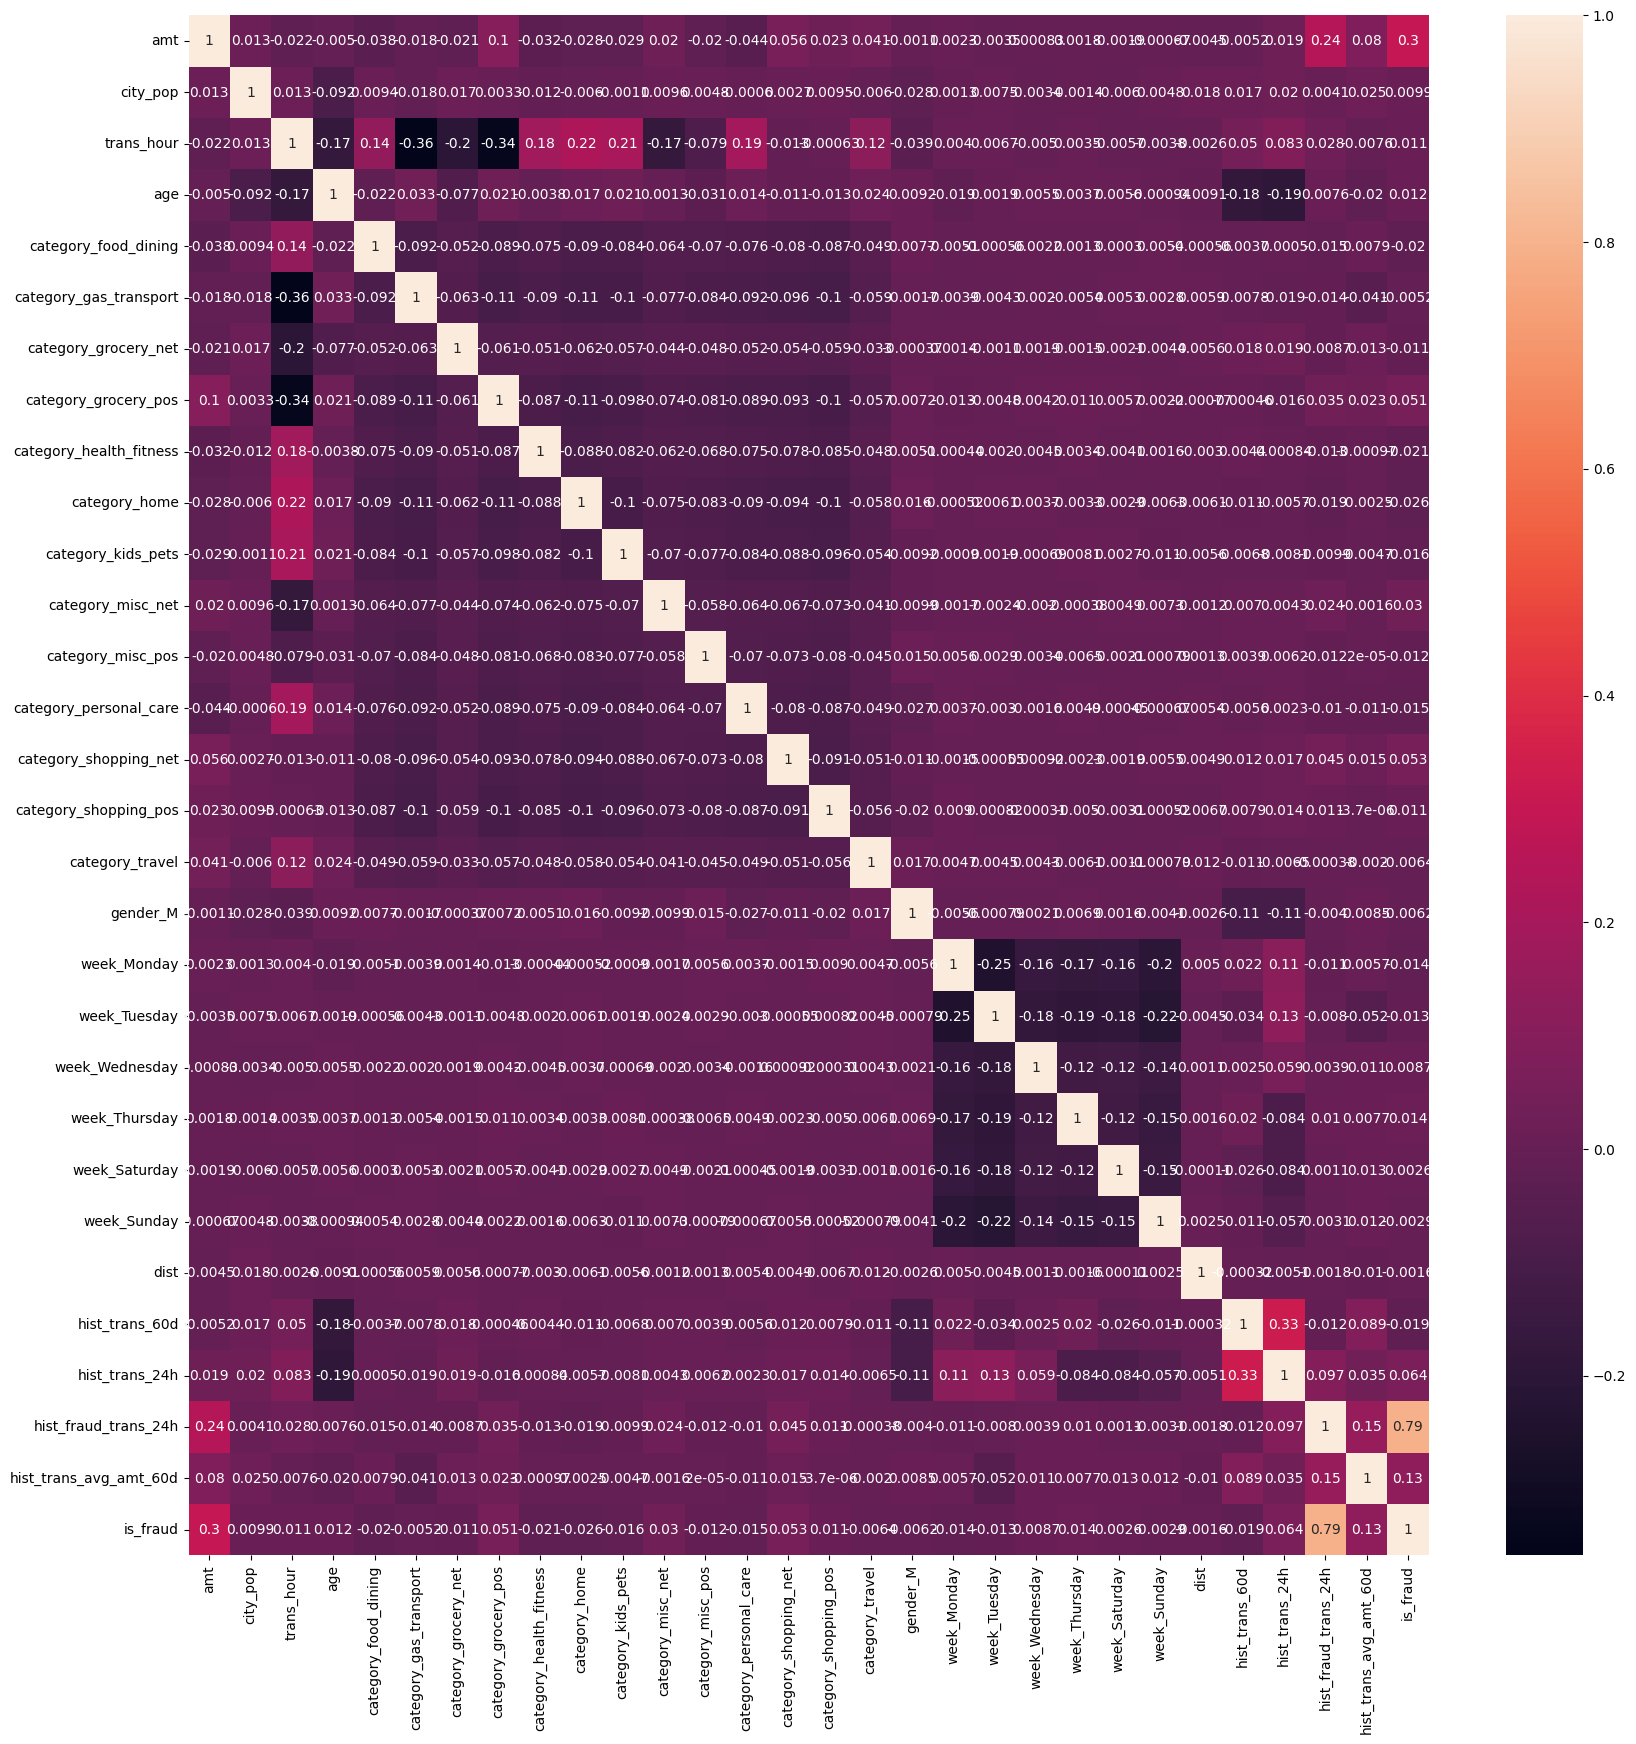

In [ ]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

In [ ]:
import plotly
import plotly.graph_objects as go

In [ ]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

Job  tran_count_by_job  \
181                                Exhibition designer                489   
187                                  Film/video editor                481   
424                           Surveyor, land/geomatics                453   
297                                    Naval architect                438   
115                         Designer, ceramics/pottery                428   
429                                  Systems developer                416   
231                                         IT trainer                403   
70                             Chief Executive Officer                386   
98                                         Comptroller                384   
67                 Chartered public finance accountant                384   
172                           Environmental consultant                383   
275                                 Materials engineer                378   
188                                  Financial adviser                368   
266                           Magazine features editor                359   
15                             Agricultural consultant                356   
316                                          Paramedic                354   
395                            Scientist, audiological                353   
472                                     Water engineer                348   
40                              Audiological scientist                334   
400                        Scientist, research (maths)                334   
105                            Copywriter, advertising                333   
421                                                Sub                328   
219  Historic buildings inspector/conservation officer                321   
52                                   Building surveyor                320   
260                                  Librarian, public                320   
149                               Engineer, automotive                316   
359                             Psychologist, forensic                312   
321                                 Petroleum engineer                311   
276                                Mechanical engineer                310   
250                            Land/geomatics surveyor                310   
287                                    Mining engineer                308   
339                                     Prison officer                304   
332                                         Podiatrist                304   
42                                           Barrister                300   
234                                       Immunologist                300   
461                                Trade mark attorney                299   
295                                           Musician                298   
392                             Sales professional, IT                297   
87                       Clothing/textile technologist                296   
82                           Claims inspector/assessor                291   
269                                               Make                289   
320                                Pensions consultant                288   
3                                Accounting technician                285   
68                                   Chemical engineer                284   
141                                Electrical engineer                283   
191                                        Firefighter                282   
189                                   Financial trader                282   
403                           Secondary school teacher                280   
108                                         Counsellor                277   
145                                    Energy engineer                276   
362                             Psychotherapist, child                275   
413                  Special educational needs 

In [ ]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [ ]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

In [ ]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

Job  is_fraud  count  tran_count_by_job  \
204                  Exhibition designer  0.000000    489                489   
210                    Film/video editor  0.000000    470                481   
211                    Film/video editor  1.000000     11                481   
481             Surveyor, land/geomatics  0.000000    439                453   
482             Surveyor, land/geomatics  1.000000     14                453   
334                      Naval architect  0.000000    438                438   
129           Designer, ceramics/pottery  0.000000    428                428   
488                    Systems developer  0.000000    416                416   
262                           IT trainer  0.000000    403                403   
79               Chief Executive Officer  0.000000    386                386   
74   Chartered public finance accountant  0.000000    374                384   
75   Chartered public finance accountant  1.000000     10                384   
110                          Comptroller  0.000000    373                384   
111                          Comptroller  1.000000     11                384   
193             Environmental consultant  0.000000    369                383   
194             Environmental consultant  1.000000     14                383   
310                   Materials engineer  0.000000    378                378   
212                    Financial adviser  0.000000    364                368   
213                    Financial adviser  1.000000      4                368   
299             Magazine features editor  1.000000     10                359   

     percent  percent_grp      label  
204 0.739307   100.000000  Not Fraud  
210 0.727212    97.713098  Not Fraud  
211 0.727212     2.286902      Fraud  
481 0.684880    96.909492  Not Fraud  
482 0.684880     3.090508      Fraud  
334 0.662202   100.000000  Not Fraud  
129 0.647083   100.000000  Not Fraud  
488 0.628940   100.000000  Not Fraud  
262 0.609286   100.000000  Not Fraud  
79  0.583584   100.000000  Not Fraud  
74  0.580560    97.395833  Not Fraud  
75  0.580560     2.604167      Fraud  
110 0.580560    97.135417  Not Fraud  
111 0.580560     2.864583      Fraud  
193 0.579048    96.344648  Not Fraud  
194 0.579048     3.655352      Fraud  
310 0.571489   100.000000  Not Fraud  
212 0.556370    98.913043  Not Fraud  
213 0.556370     1.086957      Fraud  
299 0.542763     2.785515      Fraud

In [ ]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Exhibition designer' 'Film/video editor' 'Surveyor, land/geomatics'
 'Naval architect' 'Designer, ceramics/pottery' 'Systems developer'
 'IT trainer' 'Chief Executive Officer'
 'Chartered public finance accountant' 'Comptroller'
 'Environmental consultant' 'Materials engineer' 'Financial adviser'
 'Magazine features editor']
['Not Fraud' 'Fraud']


Unnamed: 0                    Axes(0.125,0.53;0.0282847x0.35)
cc_num                     Axes(0.158942,0.53;0.0282847x0.35)
amt                        Axes(0.192883,0.53;0.0282847x0.35)
zip                        Axes(0.226825,0.53;0.0282847x0.35)
lat                        Axes(0.260766,0.53;0.0282847x0.35)
long                       Axes(0.294708,0.53;0.0282847x0.35)
city_pop                    Axes(0.32865,0.53;0.0282847x0.35)
unix_time                  Axes(0.362591,0.53;0.0282847x0.35)
merch_lat                  Axes(0.396533,0.53;0.0282847x0.35)
merch_long                 Axes(0.430474,0.53;0.0282847x0.35)
is_fraud                   Axes(0.464416,0.53;0.0282847x0.35)
trans_hour                 Axes(0.498358,0.53;0.0282847x0.35)
age                        Axes(0.532299,0.53;0.0282847x0.35)
category_food_dining       Axes(0.566241,0.53;0.0282847x0.35)
category_gas_transport     Axes(0.600182,0.53;0.0282847x0.35)
category_grocery_net       Axes(0.634124,0.53;0.0282847x0.35)
category

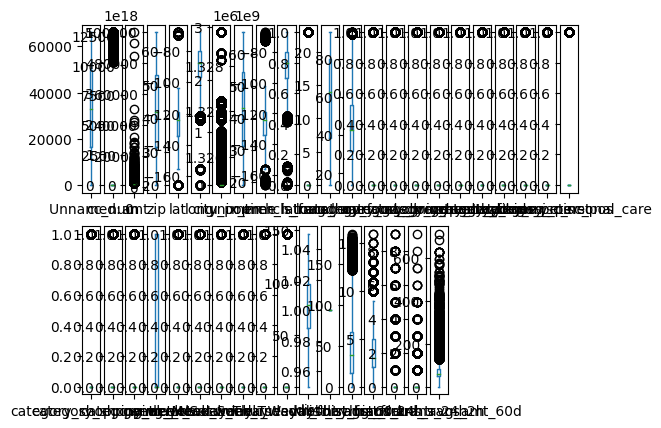

In [ ]:
df2.plot(kind='box',subplots=True,layout=(2,23))

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_hour               0
day_of_week              0
year_month               0
age                      0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time               cc_num  \
0               0   2019-01-01 00:00:18     2703186189652095   
1               1   2019-01-01 00:00:44         630423337322   
2               2   2019-01-01 00:00:51       38859492057661   
3               3   2019-01-01 00:01:16     3534093764340240   
4               4   2019-01-01 00:03:06      375534208663984   
...           ...                   ...                  ...   
66139       66139   2019-02-09 00:51:25     5456712664803820   
66140       66140   2019-02-09 00:51:29     4492491748959010   
66141       66141   2019-02-09 00:51:30     4671727014157745   
66142       66142   2019-02-09 00:52:16     6011975266774121   
66143       66143   2019-02-09 00:55:33  4502539526809429801   

                                   merchant       category        amt  \
0                fraud_Rippin, Kub and Mann       misc_net   4.970000   
1           fraud_Heller, Gutmann and Zieme    grocer

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score


In [ ]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [98]:
X_train.isnull().sum()

amt                        0
city_pop                   1
trans_hour                 0
age                        1
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M                   0
week_Monday                0
week_Tuesday               0
week_Wednesday             0
week_Thursday              0
week_Saturday              0
week_Sunday                0
dist                       1
hist_trans_60d             0
hist_trans_24h             0
hist_fraud_trans_24h       0
hist_trans_avg_amt_60d     0
dtype: int64

In [106]:
y_train.isnull().sum()

is_fraud    1
dtype: int64

In [107]:
mean_value = y_train['is_fraud'].mean()
y_train['is_fraud'].fillna(value=mean_value, inplace=True)

In [101]:
mean_value = X_train['dist'].mean()
X_train['dist'].fillna(value=mean_value, inplace=True)

In [102]:
mean_value = X_train['age'].mean()
X_train['age'].fillna(value=mean_value, inplace=True)

In [103]:
mean_value = X_train['city_pop'].mean()
X_train['city_pop'].fillna(value=mean_value, inplace=True)

In [110]:
from sklearn.preprocessing import LabelEncoder

# Encode the `y_train` variable into a binary classification target.
y_train = LabelEncoder().fit_transform(y_train)

# Fit the logistic regression model.
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [111]:

lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [115]:
X_train.isnull().sum()

amt                        0
city_pop                   1
trans_hour                 0
age                        1
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M                   0
week_Monday                0
week_Tuesday               0
week_Wednesday             0
week_Thursday              0
week_Saturday              0
week_Sunday                0
dist                       1
hist_trans_60d             0
hist_trans_24h             0
hist_fraud_trans_24h       0
hist_trans_avg_amt_60d     0
dtype: int64

In [116]:
mean_value = X_train['city_pop'].mean()
X_train['city_pop'].fillna(value=mean_value, inplace=True)

mean_value = X_train['age'].mean()
X_train['age'].fillna(value=mean_value, inplace=True)

mean_value = X_train['dist'].mean()
X_train['dist'].fillna(value=mean_value, inplace=True)

mean_value = y_train['is_fraud'].mean()
y_train['is_fraud'].fillna(value=mean_value, inplace=True)

In [122]:
from sklearn.pipeline import Pipeline

In [123]:
pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', DecisionTreeClassifier())
])

In [124]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', DecisionTreeClassifier())])

In [125]:
dt_eval = evaluate_model(pipeline, X_test, y_test)


In [126]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
X_train = X_train.dropna()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Evaluate Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

Accuracy: 0.9987301203362158
Precision: 1.0
Recall: 0.8719512195121951
F1 Score: 0.9315960912052117
Cohens Kappa Score: 0.9309582292485719
Area Under Curve: 0.9833487389262214
Confusion Matrix:
 [[16373     0]
 [   21   143]]


In [120]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)

X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1,
                                class_weight="balanced")
rf_clf.fit(X_train.fillna(0), y_train)

print("Train Results")
# Evaluate Model
rf_eval = evaluate_model(rf_clf, X_test.fillna(0), y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Train Results
Accuracy: 0.9983672975751345
Precision: 1.0
Recall: 0.8353658536585366
F1 Score: 0.9102990033222591
Cohens Kappa Score: 0.9094818437201039
Area Under Curve: 0.9903341387441847
Confusion Matrix:
 [[16373     0]
 [   27   137]]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
